In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(f"../../Data Exploration/GPS-speed/GPS_fixed_true_dist_PCA_learning_curve_valid_freq.csv", sep="&")

data.columns = [ x.replace(" ", "") for x in data.columns ]
data.columns = [ x.replace(".1", "_long") for x in data.columns ]
data.columns = [ x.replace("\\\\", "_long") for x in data.columns ]

data['PW10_long'] = data['PW10_long'].str.rstrip(' \\').astype(float)

names = data.columns.values
names[0] = "network"
data.columns = names

data['days'] = 0
data['features'] = False
data['linear'] = False
data['dropout'] = 0.0
data['freq'] = 0
data['size'] = "small"

for idx, row in data.iterrows():
    
    bits = row['network'].split("_")
    
    if(len(bits) < 3):
        continue
    
    data.loc[idx, 'days'] = int(bits[5])
  
    data.loc[idx, 'features'] = bits[1] == "True"
    
    data.loc[idx, 'linear'] = bits[3] == "True"
    
    data.loc[idx, 'dropout'] = float(bits[7])  
    
    data.loc[idx, 'freq'] = int(bits[9])  
    
    if bits[11] == "128":
        data.loc[idx, 'size'] = 'large'
        
    if bits[11] == "12":
            data.loc[idx, 'size'] = 'tiny'
    

In [3]:
# data

In [4]:

data[data['days'] == 70].groupby("size").mean()

,MAPE,RMSE,MAE,PW10,MAPE_long,RMSE_long,MAE_long,PW10_long,days,features,linear,dropout,freq
size,,,,,,,,,,,,,
large,32.5677,38.743100,16.7129,25.480300,19.281800,222.744000,139.199200,35.021300,70.0,0.5,0.0,0.000000,10.4
small,34.1355,39.774167,17.4240,23.171500,20.051583,232.279833,145.528917,33.437083,70.0,0.5,0.0,0.233333,11.0
tiny,33.7230,39.571333,17.3200,23.711667,19.940833,229.270333,144.200833,33.489833,70.0,0.5,0.0,0.000000,10.0


In [5]:
#  data.groupby("loss").max()['PW10_long']

In [6]:
#  data.groupby("loss").min()[['MAPE_long', 'RMSE_long', 'MAE_long']]

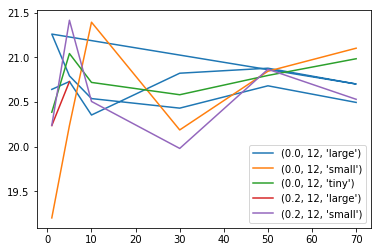

In [15]:
for names, group in data[(data['features'] == False) & (data['linear'] == False) & (data['freq'] == 12) & (data['dropout'] < 0.5)].groupby(["dropout", "freq", "size"]):
    plt.plot(group['days'],group['MAPE_long'], label=f"{names}")
    
plt.legend()    

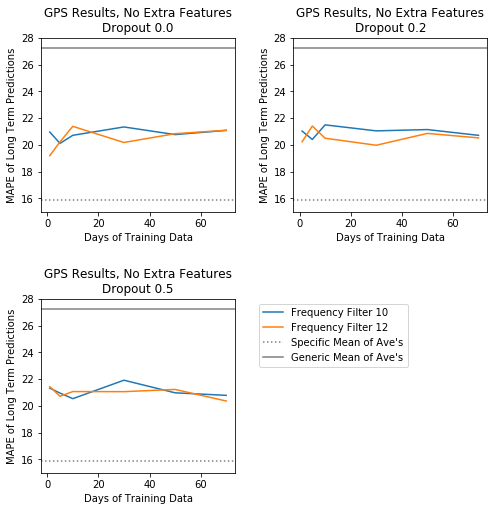

In [39]:
fig = plt.figure(figsize=(8,8))

count = 1
for dropout, lgroup in data[(data['features'] == False) & (data['linear'] == False) & (data['size'] == "small")].groupby("dropout"):
    
    plt.subplot(2,2,count)
    count += 1
    for freq, fgroup in lgroup.groupby("freq"):
        if(freq == 0):
            continue
        plt.plot(fgroup['days'],fgroup['MAPE_long'], label=f"Frequency Filter {freq}")

    plt.axhline(y=15.897, c="grey", ls=":", label="Specific Mean of Ave's")
    plt.axhline(y=27.242, c="grey", ls="-", label="Generic Mean of Ave's")
    plt.ylim(15, 28)
    plt.xlabel("Days of Training Data")
    plt.ylabel("MAPE of Long Term Predictions")
    plt.title(f"GPS Results, No Extra Features\nDropout {dropout}")

plt.legend(bbox_to_anchor=(1.1, 1))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.savefig("GPS_no_extras_dropout_freq.pdf", bbox_inches="tight")
plt.show()

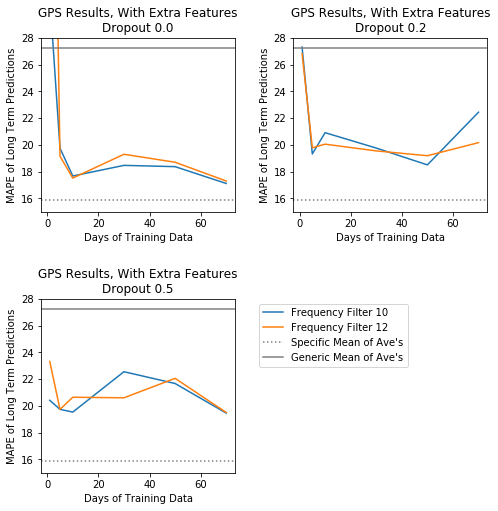

In [40]:
fig = plt.figure(figsize=(8,8))

count = 1
for dropout, lgroup in data[(data['features'] == True) & (data['linear'] == False) & (data['size'] == "small")].groupby("dropout"):
    
    plt.subplot(2,2,count)
    count += 1
    for freq, fgroup in lgroup.groupby("freq"):
        if(freq == 0):
            continue
        plt.plot(fgroup['days'],fgroup['MAPE_long'], label=f"Frequency Filter {freq}")

    plt.axhline(y=15.897, c="grey", ls=":", label="Specific Mean of Ave's")
    plt.axhline(y=27.242, c="grey", ls="-", label="Generic Mean of Ave's")
    
    plt.xlabel("Days of Training Data")
    plt.ylabel("MAPE of Long Term Predictions")
    plt.ylim(15, 28)
    plt.title(f"GPS Results, With Extra Features\nDropout {dropout}")

plt.legend(bbox_to_anchor=(1.1, 1))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.savefig("GPS_yes_extras_dropout_freq.pdf", bbox_inches="tight")
plt.show()

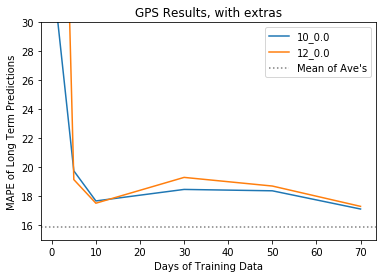

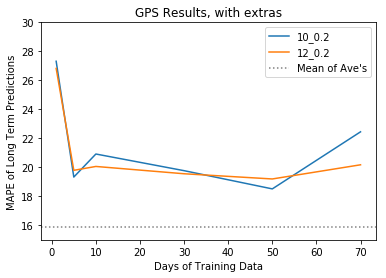

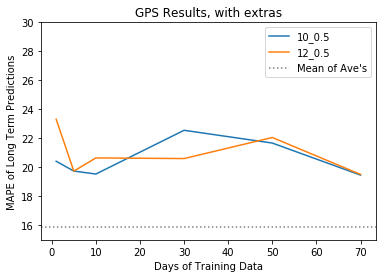

In [8]:
for dropout, lgroup in data[(data['features'] == True) & (data['linear'] == False) & (data['size'] == "small")].groupby("dropout"):
    
    for freq, fgroup in lgroup.groupby("freq"):
        plt.plot(fgroup['days'],fgroup['MAPE_long'], label=f"{freq}_{dropout}")


    plt.axhline(y=15.897, c="grey", ls=":", label="Mean of Ave's")
    plt.legend()
    plt.ylim(15,30)
    plt.xlabel("Days of Training Data")
    plt.ylabel("MAPE of Long Term Predictions")
    plt.title(f"GPS Results, with extras")
    plt.show()